In [120]:
from PIL import Image
import hitherdither
from pixelsort import pixelsort
from functools import partial
import numpy as np

In [361]:
# fp = '/home/naka/art/raster_images/20211229151438_6_The cure for loneliness, trending on ArtStation.png'
fp = '/home/naka/art/raster_images/20211231110659_A beautiful, alluring, lonely face partially obscured by elegant generative art flowers, by James Je.png'
fp = '/home/naka/art/raster_images/20220103013505_A lonely painting of the cosmos, trending on ArtStation.png'

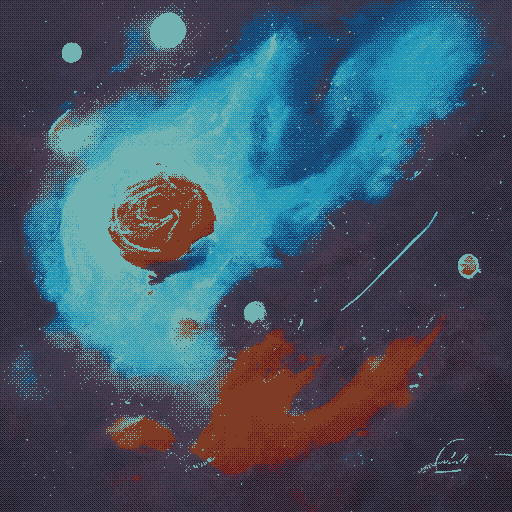

In [372]:
img = Image.open(fp)
palette = hitherdither.palette.Palette.create_by_median_cut(img, n=16)
_img = img

bayer_dither_params = {
    'palette': palette,
    'thresholds': [256/4, 256/4, 256/4],
    'order': 64,
}


dither_func = partial(hitherdither.ordered.bayer.bayer_dithering, **bayer_dither_params)
img_dithered = dither_func(_img)
new_size = [d * 3 for d in img_dithered.size]
# img_dithered.resize(new_size)
img_dithered

In [366]:

img_dithered.save('/home/naka/art/raster_images/dithered6.png')

In [338]:
_img = pixelsort(_img, **pixelsort_params)

In [341]:
_img = dither_func(_img.convert('RGB'))

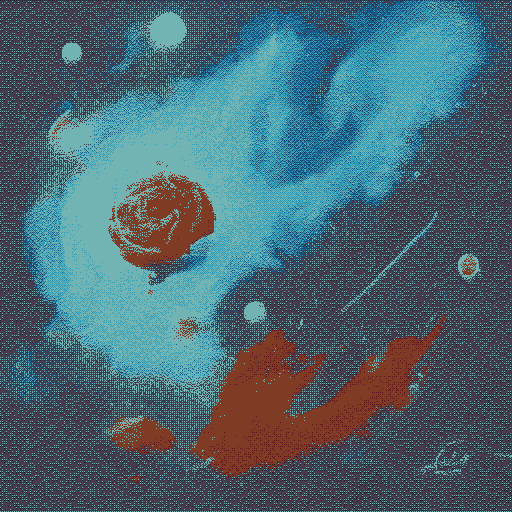

In [374]:
pixelsort_params = {
        'angle': 90,
        'interval_function': 'random',
        'sorting_function': 'lightness',
        'lower_threshold': 0.25,
        'upper_threshold': 0.75,
        'clength':4,
        }

_img = pixelsort(_img, **pixelsort_params).convert('RGB')
# _img = Image.fromarray(np.array(_img) + 30)
_img = dither_func(_img)

new_size = [d * 1 for d in _img.size]
_img.resize(new_size)

In [360]:
_img.save('/home/naka/art/raster_images/dithered5.png')

In [328]:
_img = Image.fromarray(np.array(_img))
_img = dither_func(_img)

new_size = [d * 1 for d in _img.size]
_img.resize(new_size)

ValueError: operands could not be broadcast together with shapes (768,576) (768,576,3) 

In [324]:
_img.size

(576, 768)